# Assignment No # 1

In [88]:
# Plotting a graph

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edge("Oradea","Zerind",weight=71)
G.add_edge("Zerind","Arad",weight=75) 
G.add_edge("Arad","Timisoara",weight=118)
G.add_edge("Timisoara","Lugoj",weight=111)
G.add_edge("Lugoj","Mehadia",weight=70)
G.add_edge("Mehadia","Drobeta",weight=75)
G.add_edge("Drobeta","Craiova",weight=120)
G.add_edge("Craiova","Rimnicu Vileea",weight=146)
G.add_edge("Rimnicu Vileea","Pitesti",weight=97)
G.add_edge("Craiova","Pitesti",weight=138)
G.add_edge("Rimnicu Vileea","Sibiu",weight=80)
G.add_edge("Sibiu","Arad",weight=140)
G.add_edge("Sibiu","Oradea",weight=151)
G.add_edge("Fagaras","Bucharest",weight=211)
G.add_edge("Bucharest","Pitesti",weight=101)
G.add_edge("Bucharest","Giurgiu",weight=90)
G.add_edge("Bucharest","Urziceni",weight=85)
G.add_edge("Urziceni","Hirsova",weight=98)
G.add_edge("Hirsova","Eforie",weight=86)
G.add_edge("Urziceni","Vaslui",weight=142)
G.add_edge("Vaslui","Iasi",weight=92)
G.add_edge("Sibiu","Fagaras",weight=99)
G.add_edge("Neamt","Iasi",weight=87)





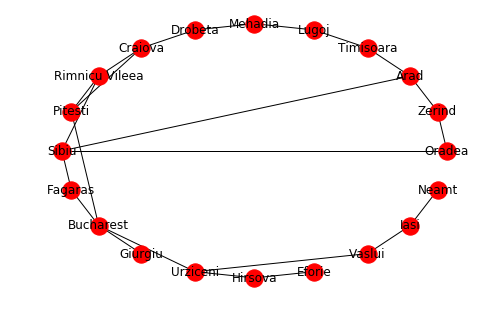

In [89]:
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels=1)
plt.show()

In [90]:
#Adjacency list of graph

list = nx.to_dict_of_dicts(G)

print("Adjacency list of graph")

for i in list :
    print(i,"---->",list[i])

Adjacency list of graph
Oradea ----> {'Zerind': {'weight': 71}, 'Sibiu': {'weight': 151}}
Zerind ----> {'Oradea': {'weight': 71}, 'Arad': {'weight': 75}}
Arad ----> {'Zerind': {'weight': 75}, 'Timisoara': {'weight': 118}, 'Sibiu': {'weight': 140}}
Timisoara ----> {'Arad': {'weight': 118}, 'Lugoj': {'weight': 111}}
Lugoj ----> {'Timisoara': {'weight': 111}, 'Mehadia': {'weight': 70}}
Mehadia ----> {'Lugoj': {'weight': 70}, 'Drobeta': {'weight': 75}}
Drobeta ----> {'Mehadia': {'weight': 75}, 'Craiova': {'weight': 120}}
Craiova ----> {'Drobeta': {'weight': 120}, 'Rimnicu Vileea': {'weight': 146}, 'Pitesti': {'weight': 138}}
Rimnicu Vileea ----> {'Craiova': {'weight': 146}, 'Pitesti': {'weight': 97}, 'Sibiu': {'weight': 80}}
Pitesti ----> {'Rimnicu Vileea': {'weight': 97}, 'Craiova': {'weight': 138}, 'Bucharest': {'weight': 101}}
Sibiu ----> {'Rimnicu Vileea': {'weight': 80}, 'Arad': {'weight': 140}, 'Oradea': {'weight': 151}, 'Fagaras': {'weight': 99}}
Fagaras ----> {'Bucharest': {'weight

In [91]:
#Assigning heuristics

heuristics_ = {
    "Arad" : 366 ,
    "Bucharest" : 0,
    "Craiova" : 160,
    "Drobeta" : 242,
    "Eforie" : 161,
    "Fagaras" : 176,
    "Giurgiu" : 77,
    "Hirsova" : 151,
    "Iasi" : 226,
    "Lugoj" : 244,
    "Mehadia" : 241,
    "Neamt" : 234,
    "Oradea" : 380,
    "Pitesti" : 100,
    "Rimnicu Vileea" : 193,
    "Sibiu" : 253,
    "Timisoara" : 329,
    "Urziceni" : 80,
    "Vaslui" : 199,
    "Zerind" : 374
}

In [92]:
#Take input from User

source = input("Enter a source node : ")
destination = input("Enter a destination node : ")


Enter a source node : Arad
Enter a destination node : Bucharest


In [159]:
# a)Breadth First Search

queue = []
visited = []

print("Search nodes : ")

bfs_cost = {source : 0}
parent = {source : None}
queue.append(source)
visited.append(source)

while queue:

    current = queue.pop(0)
    print(current, end = " ") 

    for neighbour in list[current]:
        if neighbour not in visited:
            visited.append(neighbour)
            queue.append(neighbour)
            bfs_cost[neighbour] = bfs_cost[current] + list[current][neighbour]['weight']
            parent[neighbour] = current

    if current == destination:
        print("\n\nCost of bfs = ",bfs_cost[destination])
        break

path = [destination]
temp = destination
while parent[temp] != source:
    path.append(parent[temp])
    temp = parent[temp]
path.append(source)
path.reverse()

print("\nPath Way : ",end="")
for i in path:
    print(i,end=" ")

Search nodes : 
Arad Zerind Timisoara Sibiu Oradea Lugoj Rimnicu Vileea Fagaras Mehadia Craiova Pitesti Bucharest 

Cost of bfs =  450

Path Way : Arad Sibiu Fagaras Bucharest 

In [158]:
# b)Uniform Cost Search

from queue import PriorityQueue

print("Search Nodes : ")

ucs_cost = 0
visited = []

queue = PriorityQueue()
queue.put((0,source))
parent = {source : None}

while queue:
    cost, current = queue.get()
    print(current, end=" ")
    
    if current not in visited:
        visited.append(current)
        
        if current == destination:
            ucs_cost = cost
            break
        
        for neighbour in list[current]:
            if neighbour not in visited:
                ucs_cost = cost + list[current][neighbour]['weight']
                queue.put((ucs_cost,neighbour))
                parent[neighbour] = current
        

print("\n\nCost of Ucs : ",ucs_cost)  

path = [destination]
temp = destination
while parent[temp] != source:
    path.append(parent[temp])
    temp = parent[temp]
path.append(source)
path.reverse()

print("\nPath Way : ",end="")
for i in path:
    print(i,end=" ")

Search Nodes : 
Arad Zerind Timisoara Sibiu Oradea Rimnicu Vileea Lugoj Fagaras Oradea Mehadia Pitesti Craiova Drobeta Bucharest 

Cost of Ucs :  418

Path Way : Arad Sibiu Rimnicu Vileea Pitesti Bucharest 

In [157]:
# c)Greedy Best First Search

from queue import PriorityQueue

print("Pathway of traversal : ")

gbfs_cost = 0
visited = []

queue = PriorityQueue()
queue.put((0,source))

while queue:
    cost, current = queue.get()
    print(current, end=" ")
    gbfs_cost += cost
    
    if current == destination:
        break
    
    else:
        for neighbour in list[current]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.put((heuristics_[neighbour],neighbour))
                
print("\n\nCost of gbfs : ",gbfs_cost)

Pathway of traversal : 
Arad Sibiu Fagaras Bucharest 

Cost of gbfs :  429


In [156]:
# d)Iterative deepening depth first search

iddfs_cost = 0
iddfs_path = []

def DepthLimited(src,dest,limit):
    if src == dest :
        iddfs_path.append(src)
        return True 
    
    if limit < 0 :
        return False
    
    for neighbour in list[src]:
        if DepthLimited(neighbour,dest,limit-1):
            iddfs_path.append(src)
            return True 
        
    return False


def IDDFS(src,dest,limit):
    print("Pathway of traversal : ")
    for x in range(limit):
        if DepthLimited(src,dest,x) == True :
            iddfs_path.reverse()
            for i in iddfs_path:
                print(i,end=" ")
            return
    return("Path not found")

    
IDDFS(source,destination,5)
   

Pathway of traversal : 
Arad Sibiu Fagaras Bucharest 